                                    Level 1

Task 1

-Determine the top three most common cuisines in the dataset.

-Calculate the percentage of restaurants that serve each of the top cuisines.



In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("Dataset .csv")

In [7]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Top 3 most common cuisines in data set

In [8]:
data["Cuisines"]

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [6]:
cuisines=data["Cuisines"].str.split(", ").explode()
cuisines

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19719, dtype: object

In [7]:
cuisines.count()

np.int64(19710)

In [8]:
top_cuisines=cuisines.value_counts().head(3)

Result


In [9]:
top_cuisines #Top 3 most common cuisines in dataset

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

Calculate the percentage of restaurants that serve each of the top cuisines

In [10]:
Total_restaurant = data["Restaurant ID"].count()
Total_restaurant

np.int64(9551)

In [11]:
top_cuisines_index=top_cuisines.index.to_list()
top_cuisines_index

['North Indian', 'Chinese', 'Fast Food']

In [ ]:
top_cuisines_count = data['Cuisines'].apply(
    lambda x: any(cuisine in x for cuisine in top_cuisines_index) if isinstance(x, str) else False   #checks if any cuisines at each row contains atleast one of the top 3 cousines
).sum()                         #Returns sum of true which are number of restaurants that serves atleast one of of top 3 cousines

top_cuisines_count

np.int64(6183)

Result

In [13]:
top_cuisines_percentage = (top_cuisines_count/Total_restaurant)*100
print("The percentage of restaurants that serve each of the top cuisines:",round(float(top_cuisines_percentage),1))

The percentage of restaurants that serve each of the top cuisines: 64.7


Task 2

-Identify the city with the highest number of restaurants.

-Calculate the average rating for restaurants in each city.

-Determine the city with the highest average rating.

In [2]:
import pandas as pd


data = pd.read_csv("dataset .csv")

data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [68]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


Identify the city with the highest number of restaurants

In [28]:
city_with_most_restaurants =data['City'].value_counts().head(1)
city_with_most_restaurants


City
New Delhi    5473
Name: count, dtype: int64

Calculate the average rating for restaurants in each city.

In [52]:
average_ratings = data.groupby('City')['Aggregate rating'].mean()
average_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

Finding Average Rating for a particual city  example

In [72]:
average_ratings["Hyderabad"]

np.float64(4.344444444444445)

Determine the city with the highest average rating.

In [64]:
highest_avg_rating=average_ratings.max()
city_with_highest_avg_rating = average_ratings[average_ratings==highest_avg_rating]

city_with_highest_avg_rating #Result

City
Inner City    4.9
Name: Aggregate rating, dtype: float64

The restaurants of this inner city are actually from Africa

In [57]:
data[data["City"]=="Inner City"]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9457,6501534,Cube - Tasting Kitchen,189,Inner City,"24 Albrecht Road, Maboneng Precinct, City and ...",City and Suburban,"City and Suburban, Inner City",28.060192,-26.203278,"European, Contemporary",...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,441
9458,18339373,Urbanologi,189,Inner City,"1 Fox Street, Marshalltown, Inner City, Johann...",Marshalltown,"Marshalltown, Inner City",28.031863,-26.207091,Tapas,...,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,194


Task 3

-Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

-Calculate the percentage of restaurants in each price range category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset .csv")

data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [2]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
price_range_counts = data['Price range'].value_counts()

In [4]:
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Creating a histogram or bar chart to visualize the distribution of price ranges among the restaurants.:

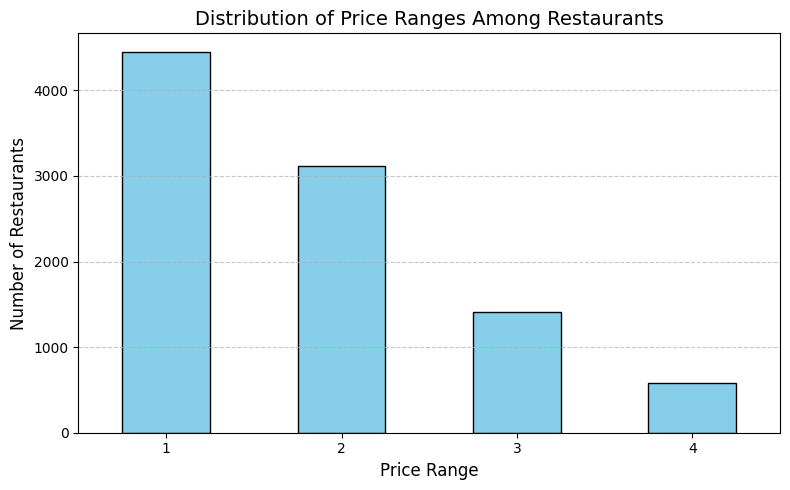

In [5]:
plt.figure(figsize=(8, 5))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculating the percentage of restaurants in each price range category:

In [8]:
price_range_percentages = (price_range_counts / price_range_counts.sum()) * 100
price_range_percentages.reset_index(name='Percentage').rename(columns={'index': 'Price Range'})

,Price range,Percentage
0,1,46.529159
1,2,32.593446
2,3,14.741912
3,4,6.135483


Task 4

-Determine the percentage of restaurants that offer online delivery.

-Compare the average ratings of restaurants with and without online delivery.

In [9]:
import pandas as pd
data = pd.read_csv('Dataset .csv')

In [10]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [19]:
online_delivery_counts = data['Has Online delivery'].value_counts()
online_delivery_percentages = (online_delivery_counts / online_delivery_counts.sum()) * 100
online_delivery_percentages

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

-Determining the percentage of restaurants that offer online delivery:

In [27]:
print(f"Percentage of restaurants that offers online delivery : {round(online_delivery_percentages['Yes'].item(),1) }%")
print(f"Percentage of restaurants that dosen't offers online delivery : {round(online_delivery_percentages['No'].item(),1) }%")

Percentage of restaurants that offers online delivery : 25.7%
Percentage of restaurants that dosen't offers online delivery : 74.3%


In [23]:
# Compare the average ratings of restaurants with and without online delivery
average_ratings = data.groupby("Has Online delivery")['Aggregate rating'].mean()
average_ratings

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

-Comparing the average ratings of restaurants with and without online delivery:

In [28]:
print(f"Average Raiting of Restaurants with online delivery : {round(average_ratings['Yes'].item(),1)}")
print(f"Average Raiting of Restaurants without online delivery : {round(average_ratings['No'].item(),1)}")

Average Raiting of Restaurants with online delivery : 3.2
Average Raiting of Restaurants without online delivery : 2.5


Restaurants with online delivery has higher ratings

                            Level 2

Task 1: Restaurant Ratings

-Analyze the distribution of aggregate ratings and determine the most common rating range.

-Calculate the average number of votes received by restaurants.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Dataset .csv")

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
Distributed_Ratings = data["Aggregate rating"].value_counts().sort_index()

In [6]:
Distributed_Ratings

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

In [14]:
Common_Rating=Distributed_Ratings.idxmax()

In [9]:
data[data["Aggregate rating"]==0]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino Fog��o,30,S��o Paulo,"Shopping Metr�� Santa Cruz - Piso L2, Rua Domi...","Shopping Metr�� Santa Cruz, Vila Mariana","Shopping Metr�� Santa Cruz, Vila Mariana, S��o...",-46.637167,-23.599500,"Brazilian, Mineira",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,S��o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, S��o Paulo",-46.698574,-23.622925,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


-Determining the most common rating range.


In [10]:
print("Common Rating :",Common_Rating.item())

Common Rating : 0.0


-Analysis the distribution of aggregate ratings 

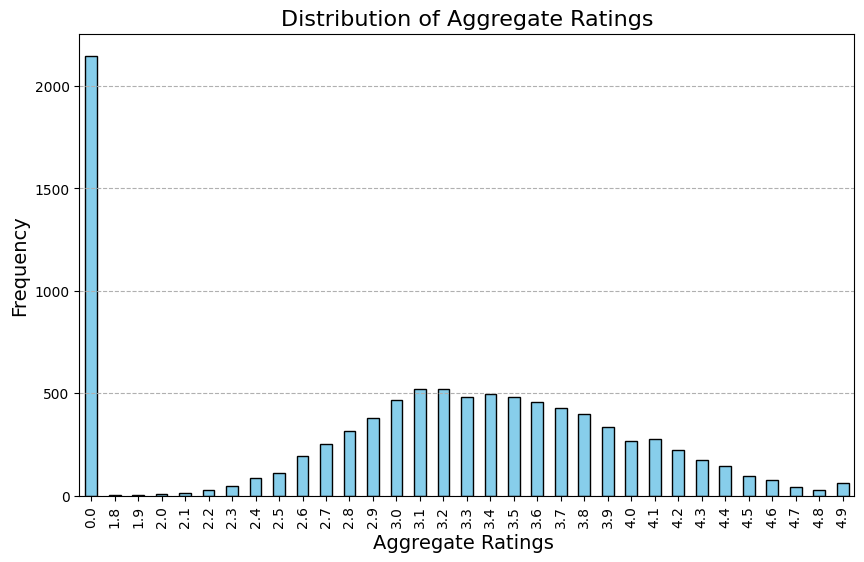

In [11]:
import matplotlib.pylab as plt
plt.figure(figsize=(10, 6))
Distributed_Ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Aggregate Ratings" , fontsize=16)
plt.xlabel("Aggregate Ratings ",fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

In [12]:
Average_Votes=data["Votes"].mean()

-Calculating the average number of votes received by restaurants.

In [13]:
print("average number of votes received by restaurants. :",round(Average_Votes.item()))


average number of votes received by restaurants. : 157


Task 2: Cuisine Combination

-Identify the most common combinations of cuisines in the dataset.

-Determine if certain cuisine combinations tend to have higher ratings.


In [2]:
from itertools import combinations
from collections import Counter

import pandas as pd
data = pd.read_csv("Dataset .csv")


In [3]:
cuisine_data = data.dropna(subset=['Cuisines'])

# Converting series of cusines into set data type
cuisine_combinations = cuisine_data['Cuisines'].apply(lambda x: tuple(sorted(x.split(', '))))

# Acts like value count alternative but better especially when computing common combination whichs is a subset of a bigger combinations
combo_counter = Counter()

# Generate all possible pairs for combo_counter
for cuisines in cuisine_combinations:
    for combo_size in range(2, len(cuisines) + 1):  
        combo_counter.update(combinations(cuisines, combo_size))


-Identify the most common combinations of cuisines in the dataset.

In [4]:
common_combinations = combo_counter.most_common(10)
common_combinations


[(('Chinese', 'North Indian'), 1784),
 (('Mughlai', 'North Indian'), 832),
 (('Fast Food', 'North Indian'), 485),
 (('Continental', 'North Indian'), 468),
 (('Chinese', 'Fast Food'), 466),
 (('North Indian', 'South Indian'), 405),
 (('Chinese', 'Mughlai'), 379),
 (('Chinese', 'Mughlai', 'North Indian'), 365),
 (('Chinese', 'South Indian'), 346),
 (('Chinese', 'Continental'), 303)]

In [5]:
rating_threshold = 4.0

high_rating_combinations = {}

for combo, count in combo_counter.most_common(1000):  
    
    matching_rows = data['Cuisines'].dropna().apply(lambda x: all(c in x for c in combo))

    # Calculate the average rating for those rows
    avg_rating = data.loc[matching_rows[matching_rows].index, 'Aggregate rating'].mean()
    
    # Include only combinations with average ratings above the threshold
    if avg_rating > rating_threshold:
        high_rating_combinations[combo] = avg_rating

high_rating_combinations = dict(sorted(high_rating_combinations.items(), key=lambda x: x[1], reverse=True))

high_rating_combinations



{('Burger', 'Tex-Mex'): np.float64(4.55),
 ('American', 'Burger', 'Tex-Mex'): np.float64(4.55),
 ('Burger', 'Mexican', 'Tex-Mex'): np.float64(4.55),
 ('American', 'Burger', 'Mexican', 'Tex-Mex'): np.float64(4.55),
 ('Cafe',
  'Continental',
  'European',
  'Italian'): np.float64(4.4799999999999995),
 ('Hawaiian', 'Seafood'): np.float64(4.475),
 ('Sandwich', 'Seafood'): np.float64(4.433333333333334),
 ('Curry', 'Indian'): np.float64(4.3999999999999995),
 ('Burger', 'Mexican'): np.float64(4.333333333333333),
 ('American', 'Burger', 'Mexican'): np.float64(4.333333333333333),
 ('Cafe', 'Continental', 'European'): np.float64(4.333333333333333),
 ('Kebab', 'Turkish Pizza'): np.float64(4.328571428571428),
 ('Caribbean', 'Seafood'): np.float64(4.324999999999999),
 ('American', 'Cafe', 'Continental', 'Italian'): np.float64(4.3),
 ('European', 'Mediterranean', 'North Indian'): np.float64(4.286666666666666),
 ('European', 'Seafood'): np.float64(4.279999999999999),
 ('Continental', 'European', 'It

-Determine if certain cuisine combinations tend to have higher ratings.

Ans> Yes it does according to data above which show some specific combinations that will tend to give higher rating.

But , they aren't the most common combinations

Task 3: Restaurant Ratings

-Plot the locations of restaurants on a map using longitude and latitude coordinates.

-Identify any patterns or clusters of restaurants in specific areas


In [23]:
import pandas as pd
data = pd.read_csv("Dataset .csv")

-Plot the locations of restaurants on a map using longitude and latitude coordinates.


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered on the average latitude and longitude
center_lat, center_lon = data['Latitude'].mean(), data['Longitude'].mean()
map_restaurants = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add a MarkerCluster to group nearby points
marker_cluster = MarkerCluster().add_to(map_restaurants)

# Add points to the map
for _, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=row['Restaurant Name']).add_to(marker_cluster)

# Save map to a file for inspection
map_path = 'restaurants_map.html'
map_restaurants.save(map_path)

print("Open map to analyze",map_path)


Open map to analyze restaurants_map.html


-Identify any patterns or clusters of restaurants in specific areas

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt

image_1 = cv.imread("Map_Images/1.png")
image_2 = cv.imread("Map_Images/2.png")
image_3 = cv.imread("Map_Images/3.jpg")

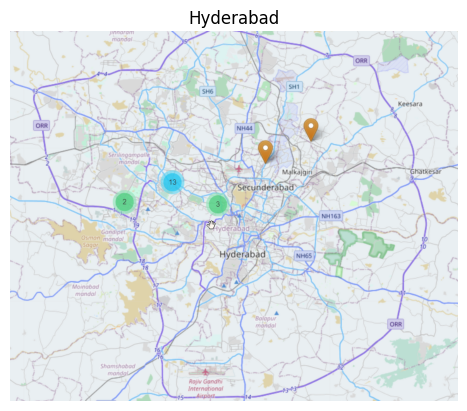

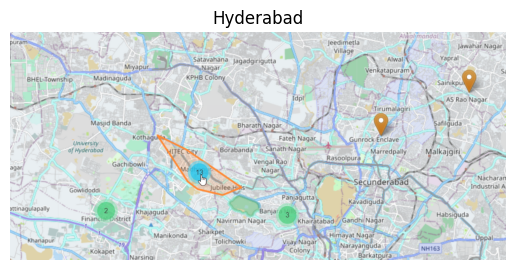

In [28]:
plt.imshow(image_1)
plt.axis('off')  # Turn off axis labels
plt.title('Hyderabad')
plt.show()

plt.imshow(image_2)
plt.axis('off')  # Turn off axis labels
plt.title('Hyderabad')
plt.show()

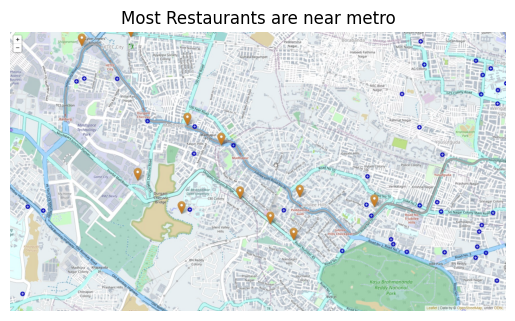

In [18]:
plt.imshow(image_3)
plt.axis('off')  
plt.title('Most Restaurants are near metro')
plt.show()

According to above image , Hydeabad has many restaurants near metro .

It's because Hitech city , Madhapur and Jublee Hills are popular and have dense poulation.

Also , there are lot of people that travel through Metro connected to those districts

(please refer the generated html to analyze in better quality)

Task 4: Restaurant Chains

-Identify if there are any restaurant chains present in the dataset.

-Analyze the ratings and popularity of different restaurant chains.

In [1]:
import pandas as pd

data = pd.read_csv("Dataset .csv")

In [51]:
# Identify potential restaurant chains by filtering off restaurants that has no branches more than 1 city
restaurant_chains = data.groupby("Restaurant Name").filter(lambda x: x["City"].nunique() > 1)
restaurant_chains["Restaurant Name"]

5           Din Tai Fung
10      Silantro Fil-Mex
12      Silantro Fil-Mex
88           Chick-fil-A
118         The National
              ...       
9431            Gymkhana
9449        The Creamery
9463        The National
9490     Jamie's Italian
9538           Starbucks
Name: Restaurant Name, Length: 1863, dtype: object

-Identify if there are any restaurant chains present in the dataset.

In [ ]:
num_chains = restaurant_chains["Restaurant Name"].nunique()
print("No of Restaurant chains : ",num_chains)
print("Yes , There are Restaurant chains present in the dataset")

No of Restaurant chains :  334
Yes , There are Restaurant chains present in the dataset


-Analyze the ratings and popularity of different restaurant chains.

In [ ]:
chain_analysis = (
    restaurant_chains.groupby("Restaurant Name")
    .agg(
        Average_Rating=("Aggregate rating", "mean"),
        Total_Votes=("Votes", "sum")
    )
    .sort_values(by=["Average_Rating", "Total_Votes"], ascending=[False, False])
    .reset_index()
)

# Display the top 10 restaurant chains based on ratings and votes
top_chains = chain_analysis.head(10)
top_chains


,Restaurant Name,Average_Rating,Total_Votes
0,Talaga Sampireun,4.900,5514
1,Silantro Fil-Mex,4.850,1364
2,AB's - Absolute Barbecues,4.825,13400
3,Gymkhana,4.700,328
4,The Cheesecake Factory,4.650,3010
5,Chili's,4.580,8156
6,The Big Chill Cakery,4.450,1059
7,Burgrill,4.450,427
8,Bombay Brasserie,4.400,1984
9,Matchbox,4.400,1214


                                                        Level 3

Task 1: Restaurant Reviews

-Analyze the text reviews to identify the most common positive and negative keywords.

-Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [1]:
import pandas as pd

data = pd.read_csv('Dataset .csv')
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [2]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [3]:
rating_text_counts =data['Rating text'].value_counts()

positive_texts = [ "Excellent",  'Very Good', 'Good']
negative_texts = ['Average', 'Poor']

positive_counts = rating_text_counts[rating_text_counts.index.isin(positive_texts)]
negative_counts = rating_text_counts[rating_text_counts.index.isin(negative_texts)]


In [4]:
[positive_counts] ,[negative_counts]


([Rating text
  Good         2100
  Very Good    1079
  Excellent     301
  Name: count, dtype: int64],
 [Rating text
  Average    3737
  Poor        186
  Name: count, dtype: int64])

Analyze the text reviews to identify the most common positive and negative keywords

In [42]:
print("Most common Positive word in reviews:",positive_counts.head(1).index.values)
print("Most common Negative word in reviews:",negative_counts.head(1).index.values)

Most common Positive word in reviews: ['Good']
Most common Negative word in reviews: ['Average']


Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [43]:
data['Review Length'] = data['Rating text'].apply(lambda x: len(str(x)))
average_review_length = round(data['Review Length'].mean())
average_review_length

7

In [44]:
data.groupby('Aggregate rating')[['Review Length',"Aggregate rating"]].head(10)

,Review Length,Aggregate rating
0,9,4.8
1,9,4.5
2,9,4.4
3,9,4.9
4,9,4.8
...,...,...
7706,4,2.0
8532,4,2.0
9104,4,2.0
9105,4,2.0


In [59]:

# Exclude rows with 'Rating color' as 'White'
data = data[data['Rating color'] != 'White']

# Add a new column for review length
data['Review Length string'] = data['Rating text'].apply(lambda x: len(str(x)))

# Visualize the relationship using a box plot
data[["Review Length string" , "Aggregate rating","Rating text",'Rating color']].drop_duplicates()



,Review Length string,Aggregate rating,Rating text,Rating color
0,9,4.8,Excellent,Dark Green
1,9,4.5,Excellent,Dark Green
2,9,4.4,Very Good,Green
3,9,4.9,Excellent,Dark Green
6,9,4.0,Very Good,Green
7,9,4.2,Very Good,Green
14,9,4.3,Very Good,Green
15,4,3.6,Good,Yellow
20,9,4.7,Excellent,Dark Green
22,7,3.0,Average,Orange


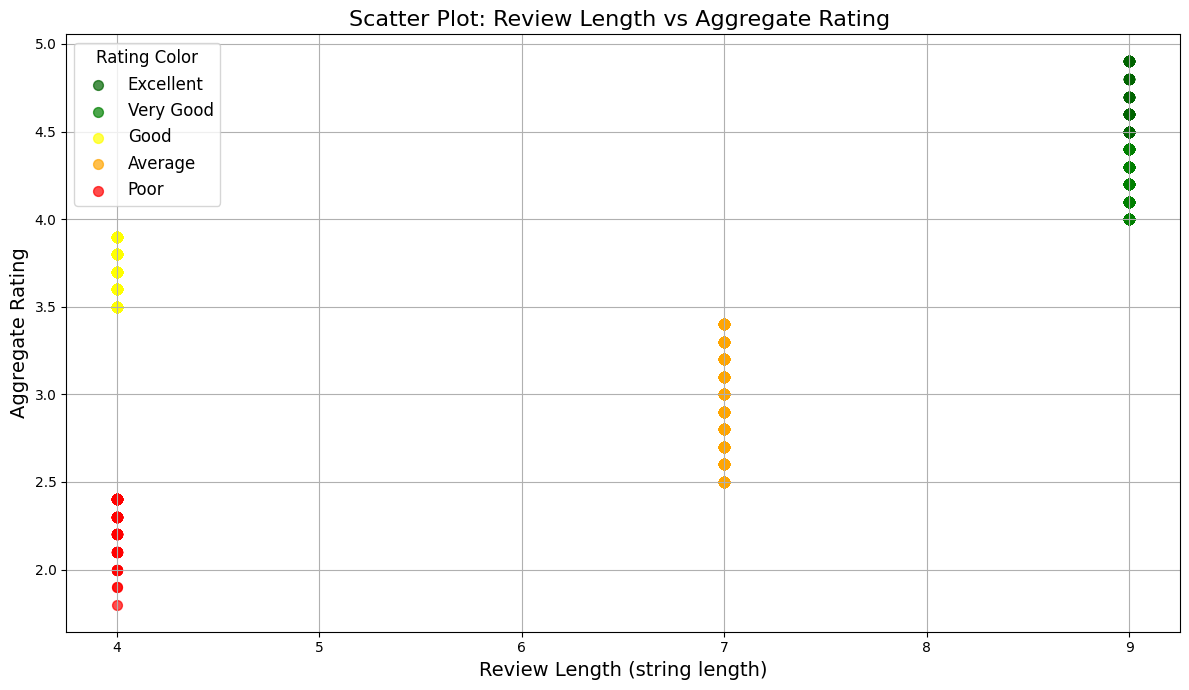

In [76]:
import matplotlib.pyplot as plt

rating_color_map = {
    "Excellent": "#006400",
    "Very Good": "#008000",
    "Good": "#FFFF00",
    "Average": "#FFA500",
    "Poor": "#FF0000"
}


data['Color'] = data['Rating text'].map(rating_color_map)


plt.figure(figsize=(12, 7))


for rating_text in rating_color_map.keys():  
    group = data[data['Rating text'] == rating_text]
    plt.scatter(group['Review Length string'], group['Aggregate rating'],
                color=rating_color_map[rating_text], label=rating_text, alpha=0.7, s=50)


plt.title('Scatter Plot: Review Length vs Aggregate Rating ', fontsize=16)
plt.xlabel('Review Length (string length)', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(True)


plt.legend(title='Rating Color', loc='upper left', fontsize=12, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


-Shorter review lengths (e.g., 4, "Poor") tend to align with lower aggregate ratings (around 2.0 to 2.5).

-Medium review lengths (e.g., 7, "Average") align with moderate aggregate ratings (around 3.0 to 3.5).

-Longer review lengths (e.g., 9, "Excellent") correlate with higher aggregate ratings (4.5 to 5.0).


The scatter plot shows a clear relationship where longer review texts ("Excellent," "Very Good") are associated with higher aggregate ratings, while shorter texts ("Poor," "Average") are linked to lower ratings.

-So there is a relation between reveiew length and aggregate ratting



Task 2: Votes Analysis

-Identify the restaurants with the highest and lowest number of votes.

-Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [2]:
import pandas as pd
data = pd.read_csv("Dataset .csv")

In [3]:
highest_votes = data.loc[data['Votes'].idxmax(), ['Restaurant Name', 'Votes']]
lowest_votes = data.loc[data['Votes'].idxmin(), ['Restaurant Name', 'Votes']]

Identify the restaurants with the highest and lowest number of votes:

In [4]:
print(highest_votes)
print("Restaurant with Highest Number of votes")

Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object
Restaurant with Highest Number of votes


In [5]:
print(lowest_votes)
print("Restaurant with Lowest Number of votes")

Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object
Restaurant with Lowest Number of votes


-Restaurant with Highest Number of votes:    Toit



-Restaurant with Lowest Number of votes:     Cantinho da Gula


Analyze if there is a correlation between the number of votes and the rating of a restaurant:

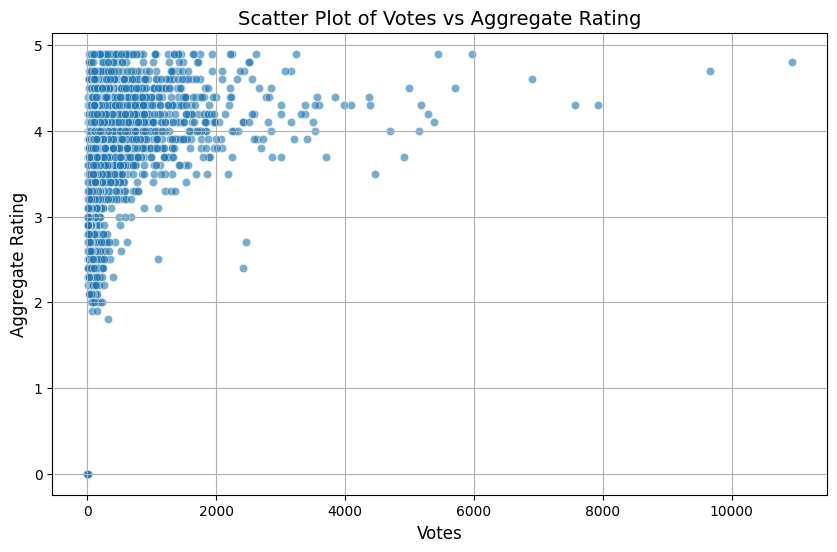

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Votes', y='Aggregate rating', alpha=0.6)
plt.title('Scatter Plot of Votes vs Aggregate Rating', fontsize=14)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(True)
plt.show()

In [7]:
correlation = data['Votes'].corr(data['Aggregate rating'])
correlation

np.float64(0.31369058419541146)

-The calculated correlation coefficient is approximately 0.314, indicating a moderate positive correlation.

-This suggests that as the number of votes increases, there is a slight tendency for the aggregate rating to also increase, though the relationship is not very strong as shown in the scattered plot as well

Task: Price Range vs. Online Delivery and Table Booking

-Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

-Determine if higher-priced restaurants are more likely to offer these services.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Dataset .csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Convert relevant columns to consistent types
data['Has Table booking'] = data['Has Table booking'].str.strip().map({'Yes': 1, 'No': 0})
data['Has Online delivery'] = data['Has Online delivery'].str.strip().map({'Yes': 1, 'No': 0})

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_4508\1138392146.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price range', y='Has Table booking', data=data, ci=None, palette='viridis')
C:\Users\Rizwan\AppData\Local\Temp\ipykernel_4508\1138392146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price range', y='Has Table booking', data=data, ci=None, palette='viridis')
C:\Users\Rizwan\AppData\Local\Temp\ipykernel_4508\1138392146.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price range', y='Has Online delivery', data=data, ci=None, palette='viridis')
C:\Users\Rizwan\AppData\Local\Temp\ipykernel_4508\1138392146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

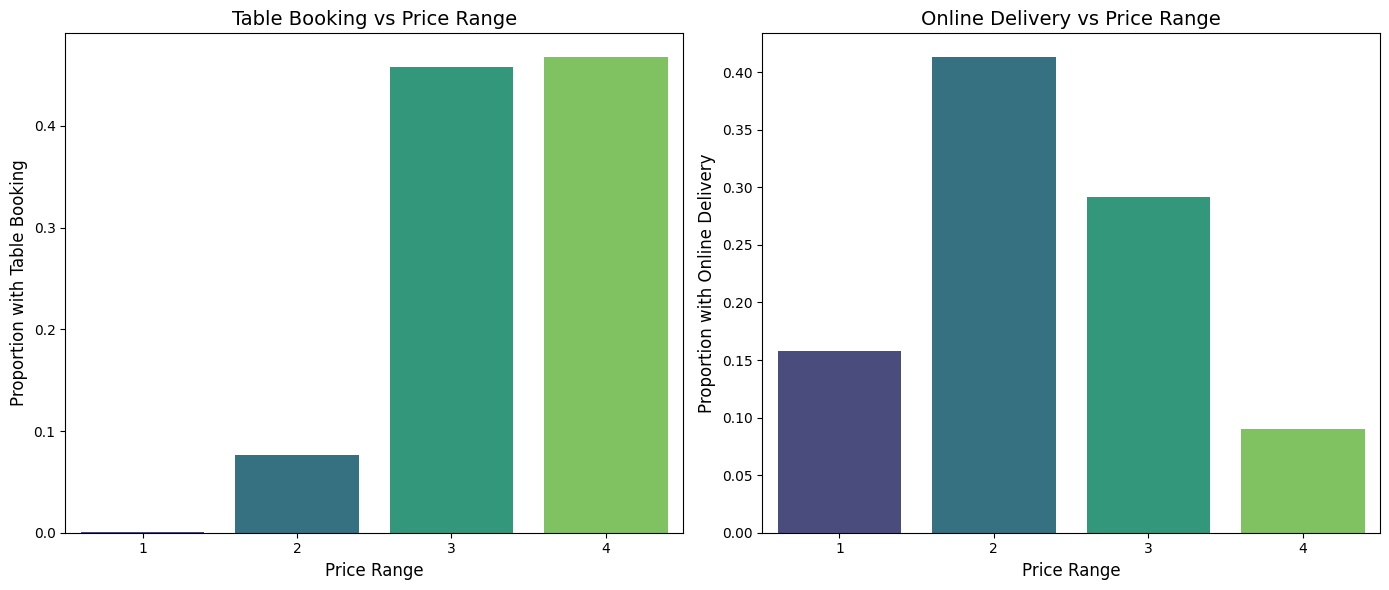

In [23]:
plt.figure(figsize=(14, 6))

# Table booking
plt.subplot(1, 2, 1)
sns.barplot(x='Price range', y='Has Table booking', data=data, ci=None, palette='viridis')
plt.title('Table Booking vs Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Proportion with Table Booking', fontsize=12)

# Online delivery
plt.subplot(1, 2, 2)
sns.barplot(x='Price range', y='Has Online delivery', data=data, ci=None, palette='viridis')
plt.title('Online Delivery vs Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Proportion with Online Delivery', fontsize=12)

plt.tight_layout()
plt.show()

From Visualization

Analyze if there is a relationship between the price range and the availability of online delivery and table booking:

- Expensive restaurants are more likely to offer table booking.  
- Cheaper restaurants are more likely to offer online delivery.  

Determine if higher-priced restaurants are more likely to offer these services:

- Yes, they are more likely to offer table booking but less likely to provide online delivery.